# Eksploratiivista data-analyyisa Ropecon 2022 datalla

Tämä notebook sisältää samat solut kuin [analysis.ipynb](analysis.ipynb). Erona on, että tässä notebookissa kielenä on suomi. Kommentteja on myös paikoin enemmän.

## Importit

In [257]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from read_data import read_data, get_all_usernames
from datetime import datetime, timedelta
import locale

locale.setlocale(locale.LC_ALL,'fi_FI')
%matplotlib widget

In [258]:
sns.set_theme('paper')
sns.set(font_scale=1.5)

## Ladataan data

Tässä käytetään omaa [read_data.py](read_data.py) moduulia

In [259]:
signedGames = read_data('users')
userSignups = read_data('signups')
results = read_data('results')
games = read_data('games')
usernames = get_all_usernames()

## Katsotaan miltä data näyttää

In [260]:
signedGames.head()

,priority,time,gameDetails.gameId,username,userGroup,serial,groupCode,createdAt,updatedAt
0,1,2022-07-31T07:00:00Z,p5349,794300,user,6624939010,0,2022-07-29T11:13:42.151Z,2022-07-31T08:00:37.262Z
1,1,2022-07-31T10:00:00Z,p5351,794300,user,6624939010,0,2022-07-29T11:13:42.151Z,2022-07-31T08:00:37.262Z
2,1,2022-07-30T14:00:00Z,p5671,74166,user,1926604032,0,2022-07-29T12:00:34.568Z,2022-07-30T16:00:34.809Z
3,3,2022-07-30T07:00:00Z,p5171,74166,user,1926604032,0,2022-07-29T12:00:34.568Z,2022-07-30T16:00:34.809Z
4,1,2022-07-30T07:00:00Z,p5575,74166,user,1926604032,0,2022-07-29T12:00:34.568Z,2022-07-30T16:00:34.809Z


In [261]:
userSignups.head()

,username,priority,time,message,game.gameId,count,createdAt,updatedAt
0,815795,0,2022-07-30T09:00:00Z,<redacted>,p5344,28,2022-07-28T17:50:57.929Z,2022-07-30T08:50:55.253Z
1,129921,0,2022-07-30T09:00:00Z,<redacted>,p5344,28,2022-07-28T17:50:57.929Z,2022-07-30T08:50:55.253Z
2,87501,0,2022-07-30T09:00:00Z,<redacted>,p5344,28,2022-07-28T17:50:57.929Z,2022-07-30T08:50:55.253Z
3,987073,0,2022-07-30T09:00:00Z,<redacted>,p5344,28,2022-07-28T17:50:57.929Z,2022-07-30T08:50:55.253Z
4,375661,0,2022-07-30T09:00:00Z,<redacted>,p5344,28,2022-07-28T17:50:57.929Z,2022-07-30T08:50:55.253Z


In [262]:
results.head()

,username,enteredGame.gameDetails.gameId,enteredGame.priority,enteredGame.time,startTime,algorithm,message,updatedAt,createdAt
0,804595,p5263,3,2022-07-29T15:00:00Z,2022-07-29T15:00:00Z,padg,"Padg Assign Result - Players: 8/12 (67%), Game...",2022-07-29T13:00:10.946Z,2022-07-29T13:00:10.946Z
1,451394,p5263,2,2022-07-29T15:00:00Z,2022-07-29T15:00:00Z,padg,"Padg Assign Result - Players: 8/12 (67%), Game...",2022-07-29T13:00:10.946Z,2022-07-29T13:00:10.946Z
2,799060,p5414,3,2022-07-29T15:00:00Z,2022-07-29T15:00:00Z,padg,"Padg Assign Result - Players: 8/12 (67%), Game...",2022-07-29T13:00:10.946Z,2022-07-29T13:00:10.946Z
3,254323,p5414,1,2022-07-29T15:00:00Z,2022-07-29T15:00:00Z,padg,"Padg Assign Result - Players: 8/12 (67%), Game...",2022-07-29T13:00:10.946Z,2022-07-29T13:00:10.946Z
4,99090,p5664,1,2022-07-29T15:00:00Z,2022-07-29T15:00:00Z,padg,"Padg Assign Result - Players: 8/12 (67%), Game...",2022-07-29T13:00:10.946Z,2022-07-29T13:00:10.946Z


In [263]:
games.head()

,gameId,accessibilityValues,contentWarnings,createdAt,description,endTime,gameSystem,genres,language,location,...,people,popularity,programType,revolvingDoor,shortDescription,startTime,styles,tags,title,updatedAt
0,p5081,[remainingOnePlace],,2022-07-17T19:54:20.195Z,Nyt pääsevät haasteesta kiinnostuneet Commande...,2022-07-29T19:00:00Z,Magic the Gathering (Formaatti: Commander),[],fi,Halli 3 Turnaussali,...,"Arno Laine, Valtteri Hyyppä",0,tournament,False,,2022-07-29T13:00:00Z,[],"[inEnglish, forAdults, tournament]",Magic the Gathering: Commander (cEDH) Double E...,2022-08-02T13:00:04.587Z
1,p5644,[],Vampires,2022-07-17T19:54:20.194Z,"No longer actually a qualifier, but we're keep...",2022-07-29T14:30:00Z,Vampire: The Eternal Struggle (VTES),[],fi,Sali 208,...,,0,tournament,False,,2022-07-29T06:30:00Z,[],"[inEnglish, tournament]",VTES: Last Chance Qualifier (LCQ),2022-08-02T13:00:04.587Z
2,p5659,[],Vampyyrit | Vampires,2022-07-17T19:54:20.195Z,HUOMAA ETTÄ PERJANTAIN ALOITTELIJATURNAUS TURN...,2022-07-29T14:00:00Z,Vampire: The Eternal Struggle (VTES),[],fi,Sali 208,...,,0,tournament,False,,2022-07-29T06:30:00Z,[],"[inEnglish, beginnerFriendly, tournament]",VTES: Perjantain aloittelijaturnaus | VTES: Be...,2022-08-02T13:00:04.586Z
3,p5117,[],"väkivalta, kuolema",2022-07-17T19:54:20.195Z,Pelaajat ovat matkalla jättien maassa yhdessä ...,2022-07-29T17:00:00Z,D&D 5e,[],fi,Lehdistötila,...,Jani Hiltunen,0,tabletopRPG,False,"Taistelupainotteinen seikkailu D&Dllä, jossa y...",2022-07-29T13:00:00Z,"[light, rulesHeavy, characterDriven, combatDri...","[forAdults, beginnerFriendly, themeFriendship]",D&D Scamatania Kääpiö jättien maassa,2022-08-02T13:00:04.587Z
4,p4867,[],,2022-07-17T19:54:20.195Z,Viisi Koboldia Trenssitakissa on hassuttelupel...,2022-07-29T17:00:00Z,D&D 5E,[],fi,Mesta,...,"Sisko ""sieppeli"" Turunen",0,tabletopRPG,False,D&D 5E kaupunkipeli yhdellä hahmoluokalla/D&D ...,2022-07-29T13:00:00Z,"[light, rulesLight, characterDriven]","[beginnerFriendly, themeFriendship]",Viisi Koboldia Trenssitakissa/Five Kobolds in ...,2022-08-02T13:00:04.587Z


## Luodaan uudet dataframet, jotka sisältävät ainoastaan pöytäropet

pyötäropejen id:t löytyvät games-dataframesta programType-sarakkeesta

In [264]:
ttrpg = games[games.programType=='tabletopRPG'].gameId.to_list()
signups_ttrpg = userSignups[userSignups['game.gameId'].isin(ttrpg)]
signedGames_ttrpg = signedGames[signedGames['gameDetails.gameId'].isin(ttrpg)]
games_ttrpg = games[games.programType == 'tabletopRPG']

### Lisätään kaikkiin uusiin pöytärope-dataframeihin datetime-sarake, joka sisältää ajan, jolloin peli alkoi

Konsti tallentaa alkamisajan vyöhykkeellä GMT, joten lisätään kaksi tuntia Konstin alkamisaikaan

In [265]:
signups_ttrpg = signups_ttrpg.assign(datetime=lambda x: [datetime.strptime(d, r'%Y-%m-%dT%H:%M:%SZ')+timedelta(hours=2) for d in signups_ttrpg.time])

In [266]:
signedGames_ttrpg = signedGames_ttrpg.assign(datetime=lambda x: [datetime.strptime(d, r'%Y-%m-%dT%H:%M:%SZ')+timedelta(hours=2) for d in signedGames_ttrpg.time])

In [267]:
results = results.assign(datetime=lambda x: [datetime.strptime(d, r'%Y-%m-%dT%H:%M:%SZ')+timedelta(hours=2) for d in results.startTime])

In [268]:
games_ttrpg = games_ttrpg.assign(datetime=lambda x: [datetime.strptime(d, r'%Y-%m-%dT%H:%M:%SZ')+timedelta(hours=2) for d in games_ttrpg.startTime])

## Kuinka moni rekistöröityy Konstiin, mutta ei koittanut päästä yhteenkään yhteenkään peliin missään muodossa (pöytärope, larp, turnaukset)

In [269]:
userSignups.shape

(1074, 8)

In [270]:
signups_ttrpg.shape

(929, 9)

In [271]:
users_with_no_games_all = []
for user in usernames:
    num_signups = userSignups[userSignups.username==user].shape[0]
    num_signedGames = signedGames[signedGames.username==user].shape[0]
    if num_signups == 0 and num_signedGames == 0:
        users_with_no_games_all.append(user)

In [272]:
print(f'{len(users_with_no_games_all)} ({np.round(len(users_with_no_games_all)/len(usernames)*100,1)}%) ei yrittänyt osallistua yhteenkään peliin missään formaatissa')

284 (26.3%) ei yrittänyt osallistua yhteenkään peliin missään formaatissa


## Kuinka monta pelaajaa ei päässyt yhteenkään peliin

In [273]:
users_with_no_games = []
for user in usernames:
    num_signups = signups_ttrpg[signups_ttrpg.username==user].shape[0]
    if num_signups == 0:
        users_with_no_games.append(user)

In [274]:
# Etistään ne pelaajat, jotka eivät ole olleet yhdessäkään ropessa, mutta ovat yrittäneet päästä vähintään yhteen peliin
users_atleast_one_signedGame = signedGames_ttrpg.username.unique()
users_no_games_and_atleast_one_signedGame = set(users_with_no_games).intersection(set(users_atleast_one_signedGame))

In [275]:
print(f"{np.round(len(users_no_games_and_atleast_one_signedGame)/len(usernames)*100,1)}% ({len(users_no_games_and_atleast_one_signedGame)}) yritti päästä pöytäropeen, mutta ei päässyt")

12.4% (134) yritti päästä pöytäropeen, mutta ei päässyt


## Kuinka moni pelaaja ei käyttänyt arvontaa, mutta pääsi peliin

In [276]:
users_with_atleast_one_signup = signups_ttrpg.username.unique()
users_with_no_signedGames_and_atleast_one_signup = set(users_with_atleast_one_signup).difference(set(users_atleast_one_signedGame))

In [277]:
print(f"{np.round(len(users_with_no_signedGames_and_atleast_one_signup)/len(usernames)*100,1)}% ({len(users_with_no_signedGames_and_atleast_one_signup)}) pääsi peliin käyttämättä arvontaa")

12.3% (133) pääsi peliin käyttämättä arvontaa


## Lasketaan kuinka moneen peliin ne käyttäjät, jotka eivät päässeet yhteenkään peliin, yrittivät päästä arvonnassa

In [278]:

num_signedGames = np.zeros((len(users_no_games_and_atleast_one_signedGame),))
for i, user in enumerate(users_no_games_and_atleast_one_signedGame):
    num_signedGames[i] = signedGames_ttrpg[signedGames_ttrpg['username'] == user].shape[0]

In [279]:
print(f"Keskimäärin käyttäjät jotka eivät päässeet yhteenkään peliin yrittivät päästä {np.round(num_signedGames.mean(),1)} peliin arvontavaiheessa")

Keskimäärin käyttäjät jotka eivät päässeet yhteenkään peliin yrittivät päästä 2.4 peliin arvontavaiheessa


### Ketkä olivat "epäonnisimmat pelaajat" (yrittivät päästä suurimpaan määrään pelejä arvonnassa, mutta eivät päässet sinne)

In [280]:
print(f"{len(num_signedGames[num_signedGames==num_signedGames.max()])} käyttäjää yrittivät päästä {int(num_signedGames.max())} pöytäropeen arvontavaiheessa, mutta eivät päässeet pelaamaan kertaakaan")

4 käyttäjää yrittivät päästä 11 pöytäropeen arvontavaiheessa, mutta eivät päässeet pelaamaan kertaakaan


### Lasketaan kuinka moni pelaaja, joka ei päässyt pelaamaan yhtään pöytäropea, yritti päästä vain yhteen peliin arvontavaiheessa

In [281]:
print(f"{len(num_signedGames[num_signedGames==1])} käyttäjää yritti päästä yhteen pöytäropeen, mutta ei päässyt pelaamaan")

64 käyttäjää yritti päästä yhteen pöytäropeen, mutta ei päässyt pelaamaan


## Kuinka moneen peliin käyttäjät yrittivät päästä arvontavaiheessa

In [282]:
num_signedGames_all = np.zeros(len(users_atleast_one_signedGame,))
for i, user in enumerate(users_atleast_one_signedGame):
    num_signedGames_all[i] = signedGames_ttrpg[signedGames_ttrpg['username'] == user].shape[0]

Text(0.5, 1.0, 'Kuinka moneen arvontaan käyttäjät osallistuivat')

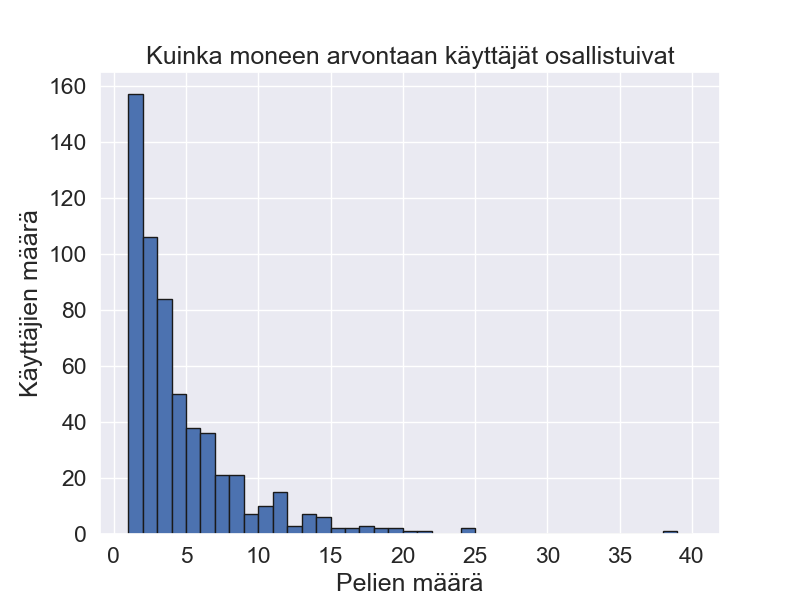

In [325]:
fig, ax = plt.subplots(figsize=(8,6))
counts, bins, bars = ax.hist(num_signedGames_all, bins=np.linspace(1,40,40), linewidth=1, edgecolor='k')
ax.set_xlabel('Pelien määrä')
ax.set_ylabel('Käyttäjien määrä')
ax.set_title('Kuinka moneen arvontaan käyttäjät osallistuivat')

In [284]:
print(f'Keskimäärin käyttäjät yrittivät päästä {np.round(np.mean(num_signedGames_all),1)} peliin')

Keskimäärin käyttäjät yrittivät päästä 4.2 peliin


In [285]:
print(f'Pelimäärän mediaani on {np.round(np.median(num_signedGames_all),1)} peliä')

Pelimäärän mediaani on 3.0 peliä


## Mikä on todennäköisyys päästä ainakin yhteen peliin arvontavaiheessa valittujen pelien funktiona

In [286]:
signedGames_total = np.linspace(1,20,20)
chance_no_game = np.zeros((signedGames_total.shape))
for i,n in enumerate(signedGames_total):
    chance_no_game[i] = len(num_signedGames[num_signedGames==n])/len(num_signedGames_all[num_signedGames_all==n])

chance_no_game

array([0.40764331, 0.31132075, 0.17857143, 0.16      , 0.07894737,
       0.05555556, 0.0952381 , 0.14285714, 0.        , 0.        ,
       0.26666667, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

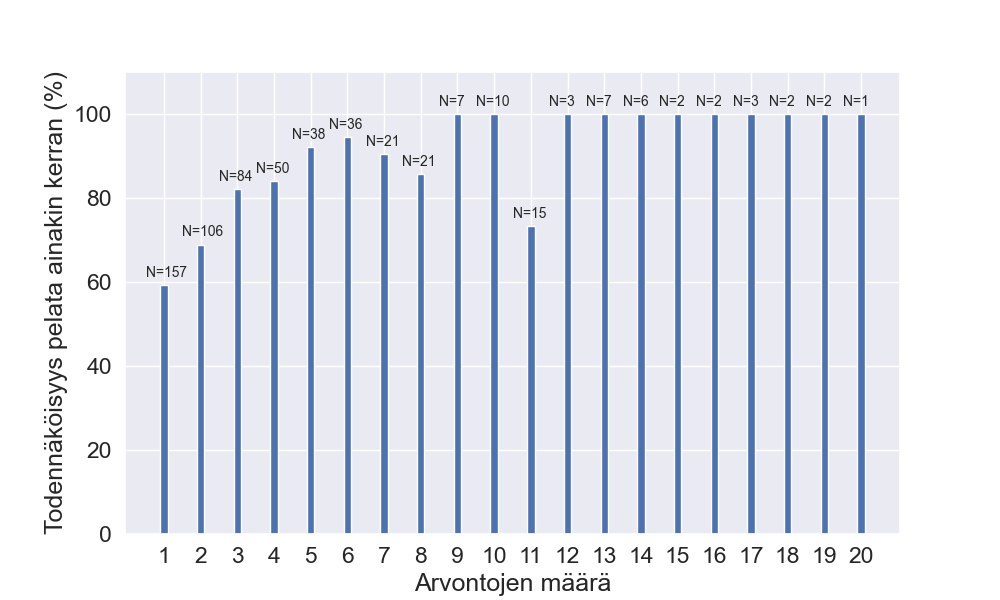

In [345]:
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(signedGames_total, (1-chance_no_game)*100, width=0.2)
ax.set_xlabel('Arvontojen määrä')
ax.set_ylabel('Todennäköisyys pelata ainakin kerran (%)')
ax.set_xticks(np.linspace(1,20,20))
ax.set_ylim([0, 110])
for i,n in enumerate(signedGames_total):
    ax.text(n-0.5, (1-chance_no_game[i])*100 + 2, f'N={len(num_signedGames_all[num_signedGames_all==n])}', fontsize=10)

## Kuinka monta peliä käyttäjät pelasivat

In [288]:
signups_ttrpg.head()

,username,priority,time,message,game.gameId,count,createdAt,updatedAt,datetime
0,815795,0,2022-07-30T09:00:00Z,<redacted>,p5344,28,2022-07-28T17:50:57.929Z,2022-07-30T08:50:55.253Z,2022-07-30 11:00:00
1,129921,0,2022-07-30T09:00:00Z,<redacted>,p5344,28,2022-07-28T17:50:57.929Z,2022-07-30T08:50:55.253Z,2022-07-30 11:00:00
2,87501,0,2022-07-30T09:00:00Z,<redacted>,p5344,28,2022-07-28T17:50:57.929Z,2022-07-30T08:50:55.253Z,2022-07-30 11:00:00
3,987073,0,2022-07-30T09:00:00Z,<redacted>,p5344,28,2022-07-28T17:50:57.929Z,2022-07-30T08:50:55.253Z,2022-07-30 11:00:00
4,375661,0,2022-07-30T09:00:00Z,<redacted>,p5344,28,2022-07-28T17:50:57.929Z,2022-07-30T08:50:55.253Z,2022-07-30 11:00:00


In [289]:
users_signup_ttrpg = signups_ttrpg.username.unique()

In [290]:
num_enteredGames = []
for user in users_signup_ttrpg:
    num_enteredGames.append(signups_ttrpg[signups_ttrpg.username==user].shape[0])
np.mean(num_enteredGames)

1.6128472222222223

Text(0.5, 1.0, 'Kuinka monta pöytäroolipeliä käyttäjät pelasivat')

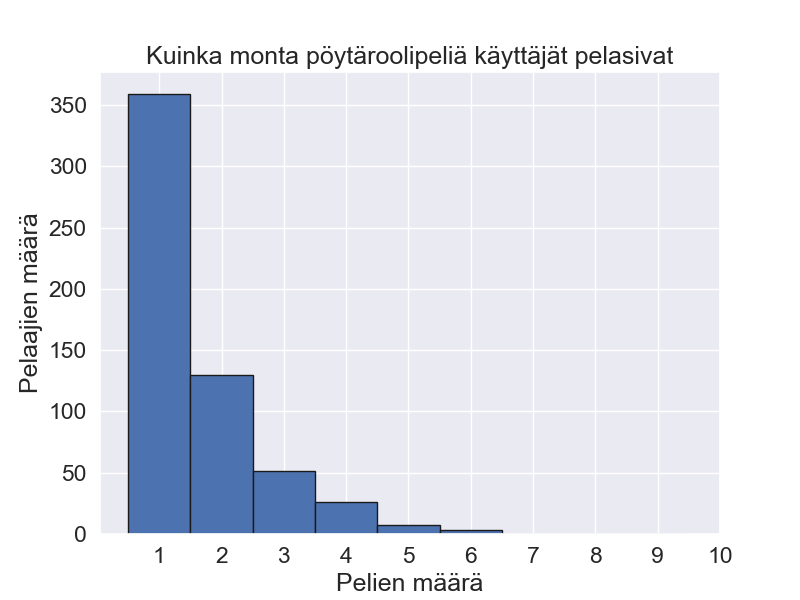

In [326]:
fig, ax = plt.subplots(figsize=(8,6))

counts, bins, bars = ax.hist(num_enteredGames, bins = np.linspace(1,10,10), linewidth=1, edgecolor='k')
ax.set_xticks(np.linspace(1,10,10)+0.5)
ax.set_xticklabels(np.linspace(1,10,10, dtype=int))
ax.set_xlabel('Pelien määrä')
ax.set_ylabel('Pelaajien määrä')
ax.set_title('Kuinka monta pöytäroolipeliä käyttäjät pelasivat')

In [292]:
print(f'Kesikimäärin käyttäjät pelasivat {np.round(np.mean(num_enteredGames),1)} peliä')
print(f'Pelattujen pelien mediaani {np.round(np.median(num_enteredGames),1)} peliä per käyttäjä')
max_games = int(np.max(num_enteredGames))
print(f'Suurimmillaan {int(counts[bins[:-1] == max_games][0])} käyttäjää pelasi {max_games} peliä')

Kesikimäärin käyttäjät pelasivat 1.6 peliä
Pelattujen pelien mediaani 1.0 peliä per käyttäjä
Suurimmillaan 3 käyttäjää pelasi 6 peliä


### Katsotaan kuinka moneen arvontaan nämä kolme käyttäjää, jotka pelasivat kuusi peliä osallistuivat

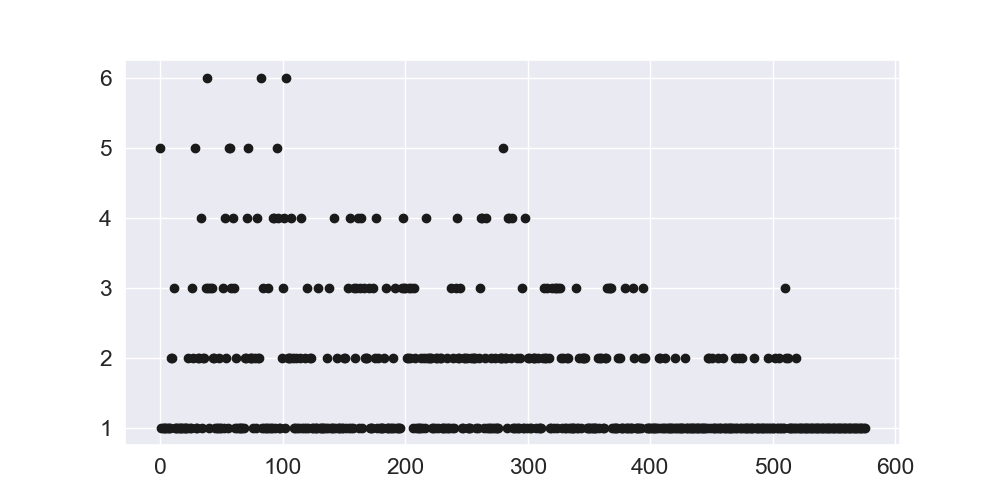

In [293]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(num_enteredGames,'ko')

In [294]:
ind_max = np.where(np.array(num_enteredGames)==6)
users_signup_ttrpg[ind_max]

array(['314827', '553492', '62531'], dtype=object)

In [295]:
for user in users_signup_ttrpg[ind_max]:
    print(signedGames_ttrpg[signedGames_ttrpg.username == user].shape[0])

14
13
20


## Kuinka moneen arvontaan osallistuttiin jokaisessa alkamisajassa

In [296]:
start_times = signedGames_ttrpg.datetime

In [297]:
num_signedGames_in_slot = signedGames_ttrpg.groupby(by='datetime').username.count()

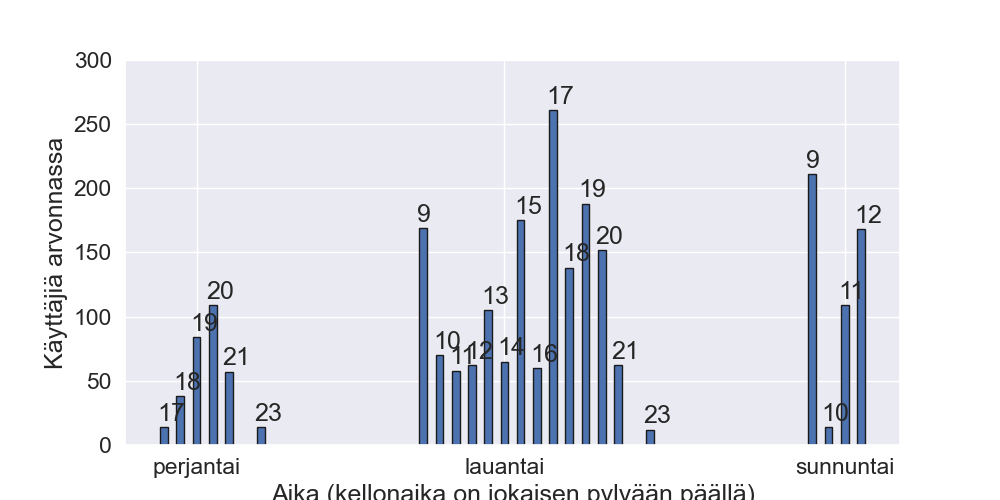

In [298]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.bar(num_signedGames_in_slot.index, num_signedGames_in_slot, width=0.02, edgecolor='k', linewidth=1)

ax.set_ylabel('Käyttäjiä arvonnassa')
ax.set_xlabel('Aika (kellonaika on jokaisen pylvään päällä)')
ax.set_xticks([datetime(2022, 7, 29, 19, 0, 0), datetime(2022, 7, 30, 14, 0, 0), datetime(2022, 7, 31, 11, 0, 0)])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%A'))
ax.set_ylim([0, 300])

for i, n in enumerate(num_signedGames_in_slot):
    ax.text(num_signedGames_in_slot.index[i]-timedelta(minutes=25), n+5, str(num_signedGames_in_slot.index[i].hour))


## Kuinka monta pelaaja kussakin aloitusajassa

In [299]:
num_players_in_slot = signups_ttrpg.groupby(by='datetime').count().username

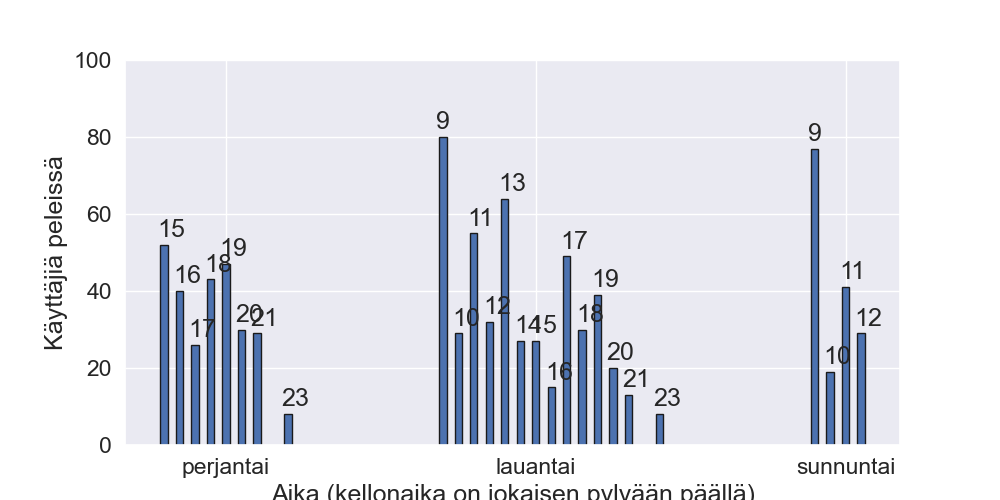

In [300]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.bar(num_players_in_slot.index, num_players_in_slot, width=0.02, edgecolor='k', linewidth=1)

ax.set_ylabel('Käyttäjiä peleissä')
ax.set_xlabel('Aika (kellonaika on jokaisen pylvään päällä)')
ax.set_xticks([datetime(2022, 7, 29, 19, 0, 0), datetime(2022, 7, 30, 15, 0, 0), datetime(2022, 7, 31, 11, 0, 0)])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%A'))
ax.set_ylim([0, 100])

for i, n in enumerate(num_players_in_slot):
    ax.text(num_players_in_slot.index[i]-timedelta(minutes=25), n+2, str(num_players_in_slot.index[i].hour))


## Kuinka täynnä jokainen aloitusaika oli

In [301]:
maxPlayers = games_ttrpg.groupby(by='datetime').sum().maxAttendance

In [302]:
maxPlayers.sum()

1043

In [303]:
len(set(users_atleast_one_signedGame).union(set(users_with_atleast_one_signup)))

710

In [304]:
len(usernames)

1080

In [305]:
xvalues = num_players_in_slot.index
increment = [i*6 for i in range(xvalues.shape[0])]
xvalues = [i + timedelta(hours=j) for i,j in zip(xvalues,increment)]

In [306]:
time_ticks = pd.date_range(xvalues[0], xvalues[-1], freq='6H')

Text(2022-08-05 21:00:00, 220, 'sunnuntai')

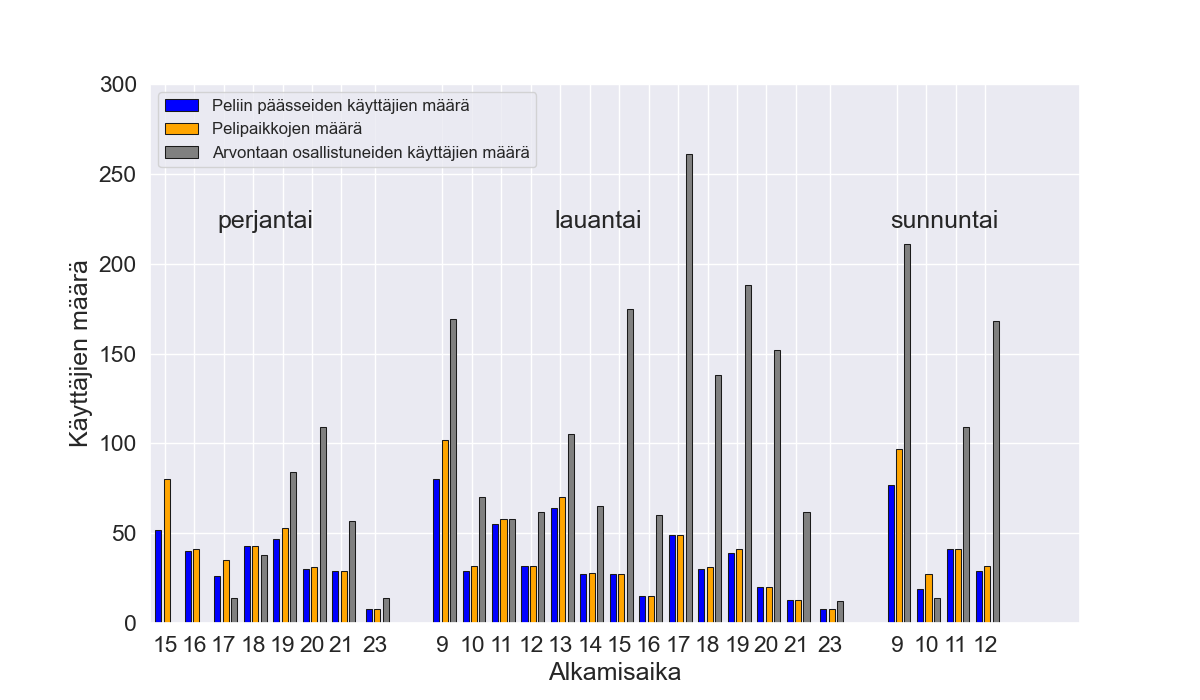

In [341]:
fig, ax = plt.subplots(figsize=(12, 7))
ax.bar([i for i in xvalues], num_players_in_slot, width=0.06, edgecolor='k', linewidth=0.75, color='blue', label='Peliin päässeiden käyttäjien määrä')
ax.bar([i+timedelta(minutes=2*60) for i in xvalues], maxPlayers, width=0.06, edgecolor='k', linewidth=0.75, color='orange', label='Pelipaikkojen määrä')
ax.bar([i+timedelta(minutes=4*60) for i in xvalues[2:]], num_signedGames_in_slot, width=0.06, edgecolor='k', linewidth=0.75, color='gray', label='Arvontaan osallistuneiden käyttäjien määrä')

ax.set_ylabel('Käyttäjien määrä')
ax.set_xlabel('Alkamisaika')
ax.set_xticks([i+timedelta(minutes=90) for i in xvalues])
ax.set_xticklabels([i.hour for i in num_players_in_slot.index])
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%H'))
ax.set_ylim([0, 300])
ax.set_xlim([datetime(2022,7,29,13,0,0), datetime(2022,8,7,18)])
ax.legend(loc='upper left', fontsize=12)
ax.text(xvalues[2], 220, 'perjantai')
ax.text(xvalues[int(len(xvalues)/2)-1], 220, 'lauantai')
ax.text(xvalues[-4], 220, 'sunnuntai')

## Kuinka monta pelaajaa / maksimi kussakin aloitusajassa

In [308]:
games_in_slot_sum = games_ttrpg.groupby(by='datetime').sum()

In [309]:
games_in_slot_sum

,maxAttendance,minAttendance,mins,popularity,revolvingDoor
datetime,,,,,
2022-07-29 15:00:00,80,36,3840,0,4
2022-07-29 16:00:00,41,18,1560,0,0
2022-07-29 17:00:00,35,19,1440,8,2
2022-07-29 18:00:00,43,21,1800,30,0
2022-07-29 19:00:00,53,29,2100,40,1
2022-07-29 20:00:00,31,17,1670,31,0
2022-07-29 21:00:00,29,14,1080,27,0
2022-07-29 23:00:00,8,2,60,8,0
2022-07-30 09:00:00,102,46,4920,70,4


Text(2022-07-31 09:00:00, 101, 'sunnuntai')

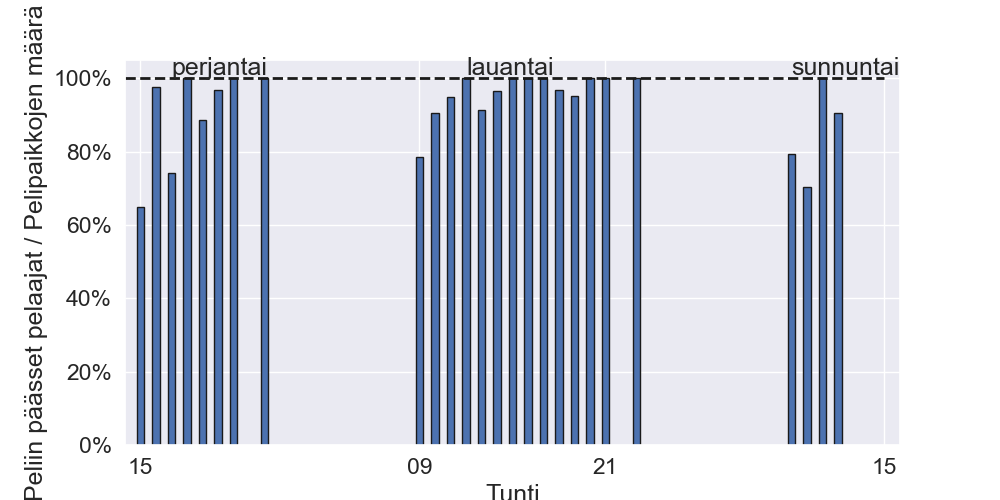

In [310]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.bar(num_players_in_slot.index, num_players_in_slot/games_in_slot_sum['maxAttendance']*100, width=0.02, edgecolor='k', linewidth=1)

ax.plot((datetime(2022,7,29,14), datetime(2022,7,31,15)), (100, 100), color='k', linestyle='--', linewidth=2)
ax.set_ylabel('Peliin päässet pelaajat / Pelipaikkojen määrä')
ax.set_xlabel('Tunti')
ax.set_xticks(time_ticks[time_ticks.hour >= 9][::2])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H'))
ax.set_ylim([0, 105])
ax.set_xlim([datetime(2022,7,29,14,0,0), datetime(2022,7,31,16)])
ax.set_yticks(np.linspace(0,100,6))
ax.set_yticklabels([f'{int(n)}%' for n in ax.get_yticks()])
ax.text(datetime(2022,7,29,17,00), 101, 'perjantai')
ax.text(datetime(2022,7,30,12,00), 101, 'lauantai')
ax.text(datetime(2022,7,31,9,00), 101, 'sunnuntai')

## Kuinka monta pelia alkoi

In [311]:
signups_ttrpg.columns

Index(['username', 'priority', 'time', 'message', 'game.gameId', 'count',
       'createdAt', 'updatedAt', 'datetime'],
      dtype='object')

In [312]:
players_in_game = signups_ttrpg.groupby(by='game.gameId').count().username

In [313]:
games_by_id = games_ttrpg.set_index(games_ttrpg.gameId)

In [314]:
games_not_started = set(games_by_id.index).difference(set(players_in_game.index))
list(games_not_started)

['p5342', 'p5754', 'p5619', 'p5753', 'p5341', 'p5842', 'p4842', 'p5539']

In [315]:
games_ttrpg.columns

Index(['gameId', 'accessibilityValues', 'contentWarnings', 'createdAt',
       'description', 'endTime', 'gameSystem', 'genres', 'language',
       'location', 'maxAttendance', 'minAttendance', 'mins', 'otherAuthor',
       'otherInaccessibility', 'people', 'popularity', 'programType',
       'revolvingDoor', 'shortDescription', 'startTime', 'styles', 'tags',
       'title', 'updatedAt', 'datetime'],
      dtype='object')

In [316]:
games_ttrpg[games_ttrpg['gameId'].isin(list(games_not_started))]

,gameId,accessibilityValues,contentWarnings,createdAt,description,endTime,gameSystem,genres,language,location,...,popularity,programType,revolvingDoor,shortDescription,startTime,styles,tags,title,updatedAt,datetime
11,p5753,[],,2022-07-17T19:54:20.195Z,Roolipelikampanja Vietnamin sodasta. Nyt 27. k...,2022-07-29T21:00:00Z,Charlie ei surffaa / Phoenix Command,[],fi,Sali 212,...,0,tabletopRPG,True,Roolipelikampanja Vietnamin sodasta,2022-07-29T13:00:00Z,"[serious, light, rulesHeavy, combatDriven]","[forAdults, beginnerFriendly, themeFriendship]",Charlie ei surffaa,2022-08-02T13:00:04.588Z,2022-07-29 15:00:00
13,p5341,[text],,2022-07-17T19:54:20.195Z,A group of determined anti-establishment heroe...,2022-07-29T17:00:00Z,Starfinder,[],fi,Sali 302,...,0,tabletopRPG,False,A Starfinder One-Shot adventure,2022-07-29T13:00:00Z,"[light, rulesHeavy, storyDriven, combatDriven]","[inEnglish, beginnerFriendly]",Starfinder One-Shot #3: System Takedown,2022-08-02T13:00:04.588Z,2022-07-29 15:00:00
46,p5342,[text],,2022-07-17T19:54:20.197Z,A Pathfinder Society Scenario designed for lev...,2022-07-29T21:00:00Z,Pathfinder 2E,[],fi,Discord: pöytäropehuone-1,...,2,tabletopRPG,False,A Pathfinder Society scenario,2022-07-29T17:00:00Z,"[rulesHeavy, combatDriven]",[inEnglish],Pathfinder Society #3-15 Cavern of Sundered Song,2022-08-02T13:00:04.589Z,2022-07-29 19:00:00
84,p4842,[recording],"väkivaltaa, sota, sodan mielettömyyttä, hahmoj...",2022-07-17T19:54:20.198Z,;tl:dr; Peli sisältää runsaasti väkivaltaa ja ...,2022-07-30T19:00:00Z,Kotikutoinen D12 järjestelmä :),[],fi,Sali 211,...,0,tabletopRPG,True,Kaartilaisen lyhyt ja tuskainen elämä taistelu...,2022-07-30T07:00:00Z,"[light, rulesLight, storyDriven, combatDriven]","[forAdults, beginnerFriendly]",Taistelu Acheron 5:stä - Pelastakaa Pastori Pl...,2022-08-02T13:00:04.592Z,2022-07-30 09:00:00
85,p5754,[],,2022-07-17T19:54:20.199Z,Roolipelikampanja Vietnamin sodasta. Nyt 27. k...,2022-07-30T20:00:00Z,Charlie ei surffaa / Phoenix Command,[],fi,Sali 212,...,0,tabletopRPG,True,Roolipelikampanja Vietnamin sodasta,2022-07-30T07:00:00Z,"[serious, light, rulesHeavy, combatDriven]","[forAdults, beginnerFriendly, themeFriendship]",Charlie ei surffaa,2022-08-02T13:00:04.592Z,2022-07-30 09:00:00
184,p5619,[],,2022-07-17T19:54:20.203Z,Maa jossa lapset ovat ainoita jotka uskovat en...,2022-07-31T09:45:00Z,Not the End,[],fi,Mesta,...,0,tabletopRPG,False,Lasten silmistä peliä pseudo 1980 luvun nurink...,2022-07-31T07:00:00Z,"[light, rulesLight, storyDriven, characterDriven]","[beginnerFriendly, themeFriendship]",Tollojen Maassa,2022-08-02T13:00:04.6Z,2022-07-31 09:00:00
192,p5539,[],"Sota, kuolema, murha, haavoittuminen, ruumiino...",2022-07-17T19:54:20.204Z,Roolipelikampanja Vietnamin sodasta. Nyt 27. k...,2022-07-31T14:00:00Z,Charlie ei surffaa / Phoenix Command,[],fi,Sali 212,...,0,tabletopRPG,True,Roolipelikampanja Vietnamin sodasta,2022-07-31T07:00:00Z,"[serious, light, rulesHeavy, combatDriven]","[forAdults, beginnerFriendly, themeFriendship]",Charlie ei surffaa,2022-08-02T13:00:04.6Z,2022-07-31 09:00:00
234,p5842,[],,2022-07-29T15:40:03.216Z,*Lempeä koneääni herättää sinut*: Varoitus. Ol...,2022-07-29T17:00:00Z,oma,[],fi,Sali 304,...,0,tabletopRPG,True,Nopeatempoinen selviytymis-puzzle peli. | A fa...,2022-07-29T15:00:00Z,"[light, rulesLight]","[inEnglish, beginnerFriendly]",Kloonialus | The Clone Ship,2022-08-02T13:00:04.589Z,2022-07-29 17:00:00


In [317]:
print(f'{len(set(games_by_id.index).difference(set(players_in_game.index)))} peliä {games_by_id.shape[0]} pelistä ei alkanut ({np.round(len(set(games_by_id.index).difference(set(players_in_game.index)))/games_by_id.shape[0]*100,1)}%)')

8 peliä 192 pelistä ei alkanut (4.2%)


In [318]:
minAttendance = []
maxAttendance = []
fillPerc = []
dt = []
for i,g in enumerate(players_in_game):
    minAttendance.append(games_by_id[games_by_id.index == players_in_game.index[i]].minAttendance.to_numpy()[0])
    maxAttendance.append(games_by_id[games_by_id.index == players_in_game.index[i]].maxAttendance.to_numpy()[0])
    fillPerc.append(g/games_by_id[games_by_id.index == players_in_game.index[i]].maxAttendance.to_numpy()[0])
    dt.append(games_by_id[games_by_id.index == players_in_game.index[i]].datetime.to_numpy()[0])

In [319]:
players_in_game_data = pd.DataFrame(data={'game': players_in_game.index, 'players': players_in_game.to_numpy(), 'maxPlayers': maxAttendance,
'minPlayers': minAttendance, 'fillPercent': fillPerc, 'datetime': dt})

In [320]:
print(f'Pelien keskimääräinen täyttöaste on {np.round(players_in_game_data.fillPercent.mean()*100,1)}% (mediaani: {np.round(players_in_game_data.fillPercent.median()*100,1)}%)')

Pelien keskimääräinen täyttöaste on 96.1% (mediaani: 100.0%)


In [321]:
num_max = players_in_game_data[players_in_game_data.players == players_in_game_data.maxPlayers].shape[0]
num_all_games = players_in_game_data.shape[0]
print(f'{num_max} peliä alkoi maksimipelaajamäärällä ({np.round(num_max/num_all_games*100,1)})%')

164 peliä alkoi maksimipelaajamäärällä (89.1)%


In [322]:
num_min = players_in_game_data[players_in_game_data.players == players_in_game_data.minPlayers].shape[0]
num_all_games = players_in_game_data.shape[0]
print(f'{num_min} peliä alkoi minimipelaajamäärällä ({np.round(num_min/num_all_games*100,1)})%')

15 peliä alkoi minimipelaajamäärällä (8.2)%


In [323]:
players_in_game_data_by_datetime = players_in_game_data.groupby(by='datetime').mean()

Text(2022-07-31 09:00:00, 101, 'sunnuntai')

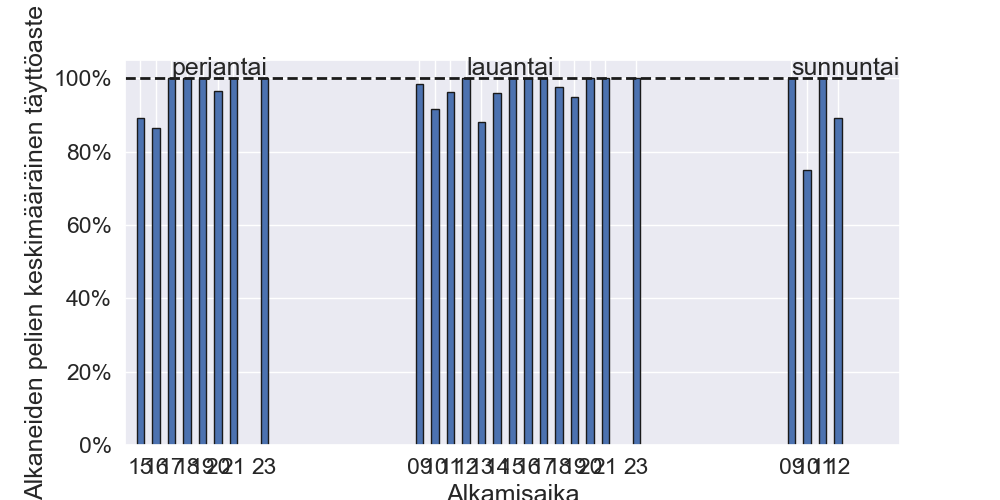

In [324]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.bar(players_in_game_data_by_datetime.index, players_in_game_data_by_datetime.fillPercent*100, width=0.02, edgecolor='k', linewidth=1)

ax.plot((datetime(2022,7,29,14), datetime(2022,7,31,15)), (100, 100), color='k', linestyle='--', linewidth=2)
ax.set_ylabel('Alkaneiden pelien keskimääräinen täyttöaste')
ax.set_xlabel('Alkamisaika')
ax.set_xticks(players_in_game_data_by_datetime.index)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H'))
ax.set_ylim([0, 105])
ax.set_xlim([datetime(2022,7,29,14,0,0), datetime(2022,7,31,16)])
ax.set_yticks(np.linspace(0,100,6))
ax.set_yticklabels([f'{int(n)}%' for n in ax.get_yticks()])
ax.text(datetime(2022,7,29,17,00), 101, 'perjantai')
ax.text(datetime(2022,7,30,12,00), 101, 'lauantai')
ax.text(datetime(2022,7,31,9,00), 101, 'sunnuntai')